In [311]:
import numpy as np
class MLP:
    
    def __init__(self, learning_rate=0.01, n_iters=100, test_size=0.15):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.test_size = test_size
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def split_dataset(self,X, y):
        '''
        Function to split the dataset into train and test data. Default size of test data is 15%.
        '''
        train_pct_index = int(self.test_size * len(X))
        X_test, X_train = X[:train_pct_index], X[train_pct_index:]
        y_test, y_train = y[:train_pct_index], y[train_pct_index:]
        return X_train, X_test, y_train, y_test

    def fit(self, X, y):
        '''
        Function to train the model on X and y training data points. Weights and Bias is initialized to 
        zero. This function prints the performance of the model for each iteration of training. Default 
        number of iterations is 100, while default learning rate is 0.01. 
        '''
        y_predicted = []
        X_train, X_test, y_train, y_test = self.split_dataset(X, y)
        
        n_samples, n_features = X_train.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array(y_train)

        for _ in range(self.n_iters):
            
            y_predicted = []
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted.append(self.activation_func(linear_output))
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted[idx])

                self.weights += update * x_i
                self.bias += update
            print('Learned weights are: \n' + str(self.weights) + '\nHyperparameters: \nEpoch number: ' + str(_) + '  Learning Rate: ' + str(self.lr))
            self.print_accuracy_metrics(y_predicted, y_)

    def predict(self):
        '''
        This function predicts the values of X_test and returns the predictiions as a numpy array. 
        '''
        y_predicted = []
        X_train, X_test, y_train, y_test = self.split_dataset(X, y)
        linear_output = np.dot(X_test, self.weights) + self.bias
        y_predicted = (self.activation_func(linear_output))
        return y_predicted

    def _unit_step_func(self, x):
        '''
        The activation function used here is a unit step function. That means, if the input is 0 or above, 
        output is 1. While, if the input is negative, output is 0. 
        '''
        return np.where(x>=0, 1, 0)
        #return 1/(1 + np.exp(-x)) 
    
    def print_accuracy_metrics(self, y_predicted, y_test = []):
        '''
        This function prints the accuracy metrics of the model. Its being called for both training and 
        test data, so that accuracy can be measured as and when an iteration or epoch is completed. It 
        compares the true and predicted values and calculates accuracy, precision, error rate, and recall 
        along with the confusion matrix and prints them after each iteration.
        '''
        X_train, X_test, y_train, y_test = self.split_dataset(X, y)
        # error = sum(np.square(y_test - y_predicted))/len(y_test)
        TP, FP, TN, FN = self.performance_measure(y_test, y_predicted)
        accuracy = (TP + TN) / len(y_test)
        error = 1 - accuracy
        if TP + FP != 0:
            precision = TP / (TP+FP)
        else:
            precision = 'Non determinable'
        if TP + FN != 0:
            recall = TP/ (TP+FN)
        else:
            recall = 'Non determinable'
        confusion_matrix = [[TN, FP], [FN, TP]]
        print('Error: '+ str(error))
        print('Accuracy: '+ str(accuracy))
        print('Precision: '+ str(precision))
        print('Recall: '+ str(recall))
        print('Confusion Matrix: '+ str(confusion_matrix))
        return confusion_matrix
        
    def performance_measure(self, y_test, y_predicted):
        '''
        This function measures the True Positive, False Positive, True Negative, and False Negative 
        values and returns them. 
        '''
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        
        for i in range(0, len(y_test)): 
            if y_test[i]==y_predicted[i]==1:
               TP += 1
            if y_predicted[i]==1 and y_test[i]!=y_predicted[i]:
               FP += 1
            if y_test[i]==y_predicted[i]==0:
               TN += 1
            if y_predicted[i]==0 and y_test[i]!=y_predicted[i]:
               FN += 1
        return TP, FP, TN, FN

Load the dataset - This dataset has 60 columns plus the decision variable 'R' and 'M'. It has a total of 208 rows.

In [297]:
X = np.loadtxt('sonar.txt', usecols=range(0,60), delimiter =',') 
labels = np.genfromtxt('sonar.txt', delimiter=',', usecols=-1, dtype=str)

Traverse through the array Labels and replace 'R' with 1 and 'M' with 0. 

In [298]:
for i,label in enumerate(labels):
    if label == 'R':
        labels[i] = 1
    else:
        labels[i] = 0

In [299]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [300]:
y = np.array(labels)
y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

Shuffle the data so that the test data towards the end does not end up with only 0's

In [301]:
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=3)
X

array([[0.0191, 0.0173, 0.0291, ..., 0.0122, 0.0114, 0.0068],
       [0.0329, 0.0216, 0.0386, ..., 0.0042, 0.0053, 0.0074],
       [0.0363, 0.0478, 0.0298, ..., 0.0114, 0.0073, 0.0033],
       ...,
       [0.115 , 0.1163, 0.0866, ..., 0.0141, 0.0068, 0.0086],
       [0.0131, 0.0201, 0.0045, ..., 0.0066, 0.0029, 0.0053],
       [0.0331, 0.0423, 0.0474, ..., 0.0044, 0.0134, 0.0092]])

Convert y from an array of strings to array of integers

In [302]:
y = y.astype(np.int)
y

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

Initialize the MLP class and fit the multi-layer perceptron model on X and y data. X and y is split implicitly inside the MLP class into training and test data

Then predict the y values for X_test and store it in y_predicted

The default number of iterations is 100, but can be changed by passing a value to n_iters. Similarly, learning rate is 0.01, but can be changed. In each iteration, we are printing the accuracy metrics for the predicted values of the training data.

In [303]:
mlp = MLP()
mlp.fit(X,y)
y_predicted = mlp.predict()

Learned weights are: 
[-0.005769 -0.00517  -0.008211 -0.009813 -0.007651  0.000723  0.007476
 -0.005699 -0.026118 -0.026186 -0.024565 -0.013207 -0.001725  0.002297
  0.003464  0.014526  0.018846  0.017368 -0.004323 -0.017566 -0.025366
 -0.02175  -0.012183 -0.001185  0.009224  0.008571 -0.000564 -0.005012
 -0.014706 -0.014573  0.002609 -0.002863  0.008705  0.023155  0.035761
  0.042022  0.031553  0.010374 -0.012091  0.003905 -0.017695 -0.031812
 -0.026066 -0.02575  -0.038325 -0.031577 -0.020524 -0.01444  -0.008849
 -0.000701 -0.002811 -0.001875 -0.000823 -0.000915  0.000145 -0.000193
 -0.000328 -0.001221 -0.000797 -0.000446]
Hyperparameters: 
Epoch number: 0  Learning Rate: 0.01
Error: 0.4516129032258065
Accuracy: 0.5483870967741935
Precision: 0.4666666666666667
Recall: 0.5384615384615384
Confusion Matrix: [[10, 8], [6, 7]]
Learned weights are: 
[-0.006756 -0.005408 -0.009258 -0.011862 -0.008171  0.001502  0.011124
 -0.008655 -0.03962  -0.034018 -0.029119 -0.012944  0.00067   0.004873
 

An accuracy of 70% has been gained on test data after 100 epochs. 

In [304]:
confusion_matrix = mlp.print_accuracy_metrics(y_predicted = y_predicted)

Error: 0.29032258064516125
Accuracy: 0.7096774193548387
Precision: 0.625
Recall: 0.7692307692307693
Confusion Matrix: [[12, 6], [3, 10]]


CONFUSION MATRIX

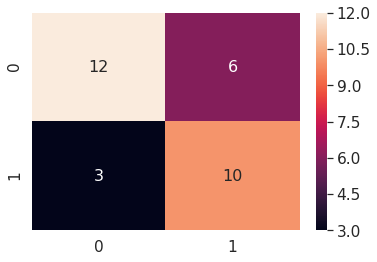

[[TN, FP], [FN, TP]]


In [309]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print('[[TN, FP], [FN, TP]]')